<a href="https://colab.research.google.com/github/nishvit/DNN/blob/master/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


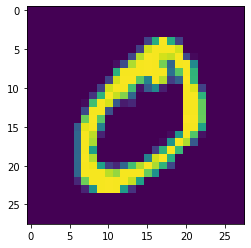

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])  # plot 1 handwritten image out of 60000 from the dataset

In [5]:
print (X_test.shape)
print (X_train.shape)
print (y_train.shape)
print (y_test.shape)

(10000, 28, 28)
(60000, 28, 28)
(60000,)
(10000,)


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)   # Convert 2D to 3D 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print (X_test.shape)
print (X_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print (X_test.shape)
print (X_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [8]:
y_train[:20]  # input dataset for the algorithm .. Increased it to 20 from originally 10

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [10]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(1, 3, 3, activation='relu', input_shape=(28,28,1))) # 26x26x1
model.add(Convolution2D(2, 3, 3, activation='relu')) # 24x24x2
model.add(Convolution2D(4, 3, 3, activation='relu')) # 22x22x4

model.add(MaxPooling2D(pool_size=(2, 2)))# 11x11x4

model.add(Convolution2D(8, 3, 3, activation='relu'))# 9x9x8
model.add(Convolution2D(16, 3, 3, activation='relu'))# 7x7x16


model.add(Convolution2D(32, 3, 3, activation='relu'))# 5x5x32

model.add(Convolution2D(64, 3, 3, activation='relu'))# 3x3x64
model.add(Convolution2D(10, 3, 3, activation='relu')) #1x1x10

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 1)         10        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 2)         20        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 4)         76        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 8)           296       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 32)         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

#/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
#  """Entry point for launching an IPython kernel.
#Epoch 1/10
#60000/60000 [==============================] - 16s 265us/step - loss: 0.9486 - accuracy: 0.7217
#Epoch 2/10
#60000/60000 [==============================] - 10s 164us/step - loss: 0.7636 - accuracy: 0.7800
#Epoch 3/10
#60000/60000 [==============================] - 10s 161us/step - loss: 0.7397 - accuracy: 0.7860
#Epoch 4/10
#60000/60000 [==============================] - 10s 159us/step - loss: 0.7281 - accuracy: 0.7894
#Epoch 5/10
#60000/60000 [==============================] - 10s 160us/step - loss: 0.5552 - accuracy: 0.8637
#Epoch 6/10
#60000/60000 [==============================] - 10s 159us/step - loss: 0.4950 - accuracy: 0.8876
#Epoch 7/10
#60000/60000 [==============================] - 9s 158us/step - loss: 0.4888 - accuracy: 0.8903
#Epoch 8/10
#60000/60000 [==============================] - 10s 159us/step - loss: 0.3732 - accuracy: 0.9391
#Epoch 9/10
#60000/60000 [==============================] - 10s 159us/step - loss: 0.2576 - accuracy: 0.9886
#Epoch 10/10
#60000/60000 [==============================] - 10s 161us/step - loss: 0.2530 - accuracy: 0.9899
#<keras.callbacks.callbacks.History at 0x7f96c01f1dd8>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 15s 256us/step - loss: 1.3074 - accuracy: 0.5739
Epoch 2/10
60000/60000 [==============================] - 9s 153us/step - loss: 1.1924 - accuracy: 0.5987
Epoch 3/10
60000/60000 [==============================] - 9s 152us/step - loss: 1.1730 - accuracy: 0.6028
Epoch 4/10
60000/60000 [==============================] - 9s 152us/step - loss: 1.1628 - accuracy: 0.6047
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss: 1.1569 - accuracy: 0.6055
Epoch 6/10
60000/60000 [==============================] - 9s 153us/step - loss: 1.1527 - accuracy: 0.6054
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step - loss: 1.1471 - accuracy: 0.6072
Epoch 8/10
60000/60000 [==============================] - 9s 151us/step - loss: 1.1471 - accuracy: 0.6070
Epoch 9/10
60000/60000 [==============================] - 9s 151us/step - loss: 1.1444 - accuracy: 0.6075
Epoch 10/10
60000/60000 [====================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[1.1714739881515503, 0.6029999852180481]


In [0]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred[:9])
print(y_test[:9])

#[[1.92659755e-08 1.92659755e-08 1.65647521e-07 1.92659755e-08
#  1.92659755e-08 1.92659755e-08 1.92659755e-08 9.99999762e-01
#  1.92659755e-08 1.92659755e-08]
# [4.57669239e-06 4.57669239e-06 9.99958754e-01 4.57669239e-06
#  4.57669239e-06 4.57669239e-06 4.57669239e-06 4.57669239e-06
#  4.57669239e-06 4.57669239e-06]
# [3.34561427e-08 9.99987960e-01 5.08468538e-08 3.34561427e-08
#  2.38183543e-06 1.45297963e-06 3.34561427e-08 7.56363488e-06
#  4.00286808e-07 3.34561427e-08]
# [1.00000001e-01 1.00000001e-01 1.00000001e-01 1.00000001e-01
#  1.00000001e-01 1.00000001e-01 1.00000001e-01 1.00000001e-01
#  1.00000001e-01 1.00000001e-01]
# [1.55468083e-08 1.55468083e-08 1.55468083e-08 1.55468083e-08
#  9.99999642e-01 1.55468083e-08 1.55468083e-08 1.55468083e-08
#  1.55468083e-08 2.62763052e-07]
# [6.00189676e-09 9.99994516e-01 2.08135429e-08 6.00189676e-09
#  1.03988164e-07 2.34852820e-07 6.00189676e-09 5.02389412e-06
#  1.32075996e-07 6.00189676e-09]
# [2.00848120e-07 2.00848120e-07 7.49142771e-07 2.00848120e-07
#  9.99997616e-01 2.00848120e-07 2.00848120e-07 2.00848120e-07
#  3.24467464e-07 2.00848120e-07]
# [9.14520626e-07 9.14520626e-07 9.14520626e-07 9.14520626e-07
#  7.73164138e-05 2.69550073e-04 9.14520626e-07 9.14520626e-07
#  9.14520626e-07 9.99646664e-01]
# [7.18548199e-06 7.18548199e-06 7.18548199e-06 7.18548199e-06
#  7.18548199e-06 9.86605346e-01 8.84316396e-03 7.18548199e-06
#  4.50130552e-03 7.18548199e-06]]#

[[5.29782653e-08 5.29782653e-08 5.29782653e-08 5.29782653e-08
  5.29782653e-08 5.29782653e-08 5.29782653e-08 9.99999523e-01
  5.29782653e-08 5.29782653e-08]
 [1.00000001e-01 1.00000001e-01 1.00000001e-01 1.00000001e-01
  1.00000001e-01 1.00000001e-01 1.00000001e-01 1.00000001e-01
  1.00000001e-01 1.00000001e-01]
 [5.07597679e-06 9.99922633e-01 5.07597679e-06 5.07597679e-06
  5.07597679e-06 5.07597679e-06 5.07597679e-06 5.07597679e-06
  3.67037246e-05 5.07597679e-06]
 [1.00000001e-01 1.00000001e-01 1.00000001e-01 1.00000001e-01
  1.00000001e-01 1.00000001e-01 1.00000001e-01 1.00000001e-01
  1.00000001e-01 1.00000001e-01]
 [1.55007170e-11 1.55007170e-11 1.55007170e-11 1.55007170e-11
  1.00000000e+00 1.55007170e-11 1.55007170e-11 1.55007170e-11
  1.55007170e-11 1.55007170e-11]
 [4.19160045e-07 9.99986529e-01 4.19160045e-07 4.19160045e-07
  4.19160045e-07 4.19160045e-07 4.19160045e-07 4.19160045e-07
  1.00705265e-05 4.19160045e-07]
 [3.58507975e-07 3.58507975e-07 3.58507975e-07 3.58507975e

In [0]:
# Issues with the Initial code
# 1. Small input dataset
# 2. Too much noise in the dataset so using too manyt channels is redundant